## Compute Sagnac Frequency - Spectrum

## Imports

In [1]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime
from numpy import mean, median

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [3]:
config = {}

config['seed'] = "BW.DROMY..FJZ"

## Easter
config['tbeg'] = UTCDateTime("2023-04-07 00:00")
config['tend'] = UTCDateTime("2023-04-10 00:00")

config['datapath'] = data_path+"sagnac_frequency/easter/"


## PRISM
config['tbeg'] = UTCDateTime("2023-05-09 01:00")
config['tend'] = UTCDateTime("2023-05-09 04:00")

config['datapath'] = data_path+"sagnac_frequency/prism/"


## Load Data

In [4]:
# def __load_data(config):
    
#     net, sta, loc, cha = config['seed'].split(".")
    
#     t1 = date.fromisoformat(str(config['tbeg'].date))
#     t2 = date.fromisoformat(str(config['tend'].date))

#     df = DataFrame()
#     for dat in date_range(t1,t2):
#         file = cha+"_"+str(dat)[:10].replace("-","")+".pkl"

#         try:
#             df0 = read_pickle(config['datapath']+file)
#             df = concat([df, df0])
#         except:
#             print(f"error for {config['datapath']}{file}")
            
#     return df

In [5]:
# config['seed'] = "BW.DROMY..FJZ"
# fjz = __load_data(config)

# # config['seed'] = "BW.DROMY..F1V"
# # f1z = __load_data(config)

# # config['seed'] = "BW.DROMY..F4V"
# # f2z = __load_data(config)

## Plot Daily Hourly Spectra

In [6]:
df = read_pickle("/home/andbro/freenas/romy_autodata/2023/RZ/RZ_20230518_spectra.pkl")

freqs = df['frequencies']
psds = df['psds']

FileNotFoundError: [Errno 2] No such file or directory: '/home/andbro/freenas/romy_autodata/2023/RZ/RZ_20230518_spectra.pkl'

NameError: name 'psds' is not defined

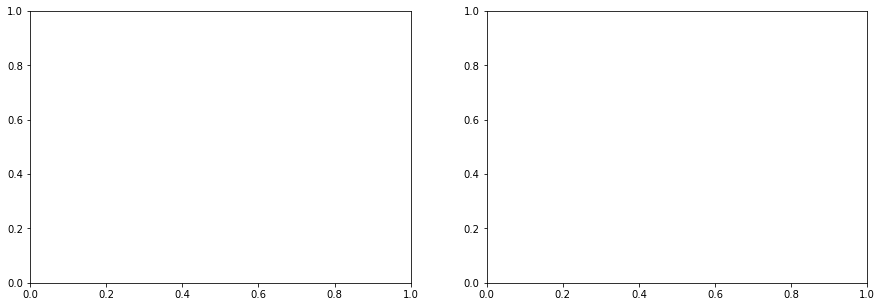

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

for psd in psds:
    print(median(psd[:10_000]))
    if median(psd[:10_000]) > 1e-7:
        ax[0].loglog(freqs, psd, color='grey', alpha=0.2, zorder=0)
#         ax[1].loglog(freqs, psd, color='grey', alpha=0.2, zorder=0)
    else:
        ax[0].loglog(freqs, psd)
        ax[1].loglog(freqs, psd)
        
ax[1].set_xlim(553-30, 553+30)
